In [12]:
# To handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns
#ignore the warning
import warnings
warnings.filterwarnings("ignore")

df_2018=pd.read_csv('../input/stack-overflow-2018-developer-survey/survey_results_public.csv')
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [13]:
 # Filter the dataframe by United States
US_2018 = df_2018[df_2018.Country=='United States']

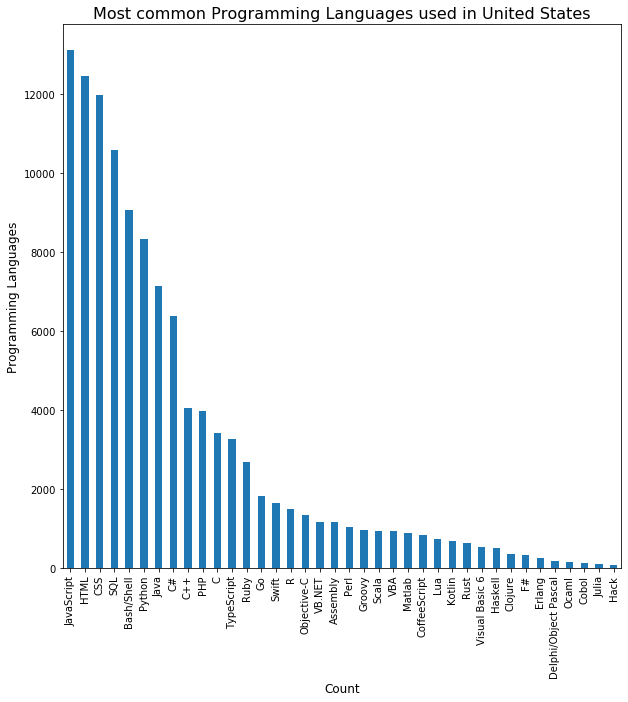

In [14]:
#Find the most common language in US
Top_languages = US_2018['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts()   #Splitting the row  values wrt ;
plt.figure(figsize=(10,10))                                                                      #Setting the dimensions of frame
Top_languages.plot(kind="bar")                                                                   #Setting th type of graph as bar
plt.xlabel("Count", fontsize = 12)                                                      
plt.ylabel("Programming Languages", fontsize = 12)  

plt.title('Most common Programming Languages used in United States', size = 16)
plt.show()

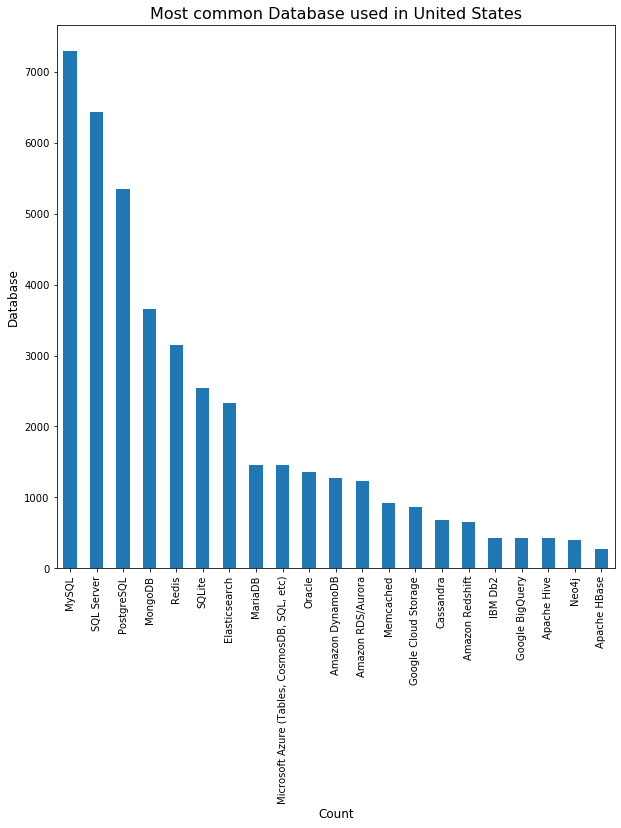

In [15]:
#Find the most common databse in US
Top_databases = US_2018['DatabaseWorkedWith'].str.split(';', expand=True).stack().value_counts()   #Splitting the row  values wrt ;
plt.figure(figsize=(10,10))                                                                          #Setting the dimensions of frame
Top_databases.plot(kind="bar")                                                                       #Setting th type of graph as bar
plt.xlabel("Count", fontsize = 12)         
plt.ylabel("Database", fontsize = 12)

plt.title('Most common Database used in United States', size = 16)
plt.show()

In [16]:
#Find the relationship between the most common langauge and the salary given for that language
Lang_Hsalary = US_2018[['DevType', 'LanguageWorkedWith', 'ConvertedSalary']]  #Make  a new table from US_2018 with DevtYoe,LAnguage and Salary as the columns

Lang_Hsalary = Lang_Hsalary[Lang_Hsalary.DevType == "Full-stack developer"]   #Filter the data and keep only those data where the devtype of a programmer is full stack

Lang_Hsalary= Lang_Hsalary.dropna(subset=['ConvertedSalary', 'LanguageWorkedWith'], axis=0)  # Drop the rows where salary and devtype is nan
Lang_Hsalary.head()


,DevType,LanguageWorkedWith,ConvertedSalary
33,Full-stack developer,JavaScript;PHP;HTML;CSS,60000.0
159,Full-stack developer,C#;JavaScript;PHP;SQL;TypeScript;HTML;CSS,120000.0
169,Full-stack developer,Assembly;C;C++;C#;JavaScript;Rust;SQL;HTML;CSS,97000.0
178,Full-stack developer,Java;JavaScript;Python;SQL;TypeScript;HTML;CSS...,125000.0
475,Full-stack developer,C;JavaScript;PHP;Python;SQL;TypeScript;HTML;CS...,684000.0


In [17]:
"""
Split a columns values  meanwhile 
 retaining the associated value of another column.
    """
sal_table = pd.DataFrame(Lang_Hsalary.LanguageWorkedWith.str.split(';').tolist(), index=Lang_Hsalary.ConvertedSalary).stack()    # split the string with ;
sal_table = sal_table.reset_index()[[0, 'ConvertedSalary']] #  LanguageWorkedWith column is currently labeled as 0
sal_table.columns = ['LanguageWorkedWith', 'ConvertedSalary']   #Setting 0 back to LanguageWorkedWith
sal_table.head()                                                #Displaying the table

,LanguageWorkedWith,ConvertedSalary
0,JavaScript,60000.0
1,PHP,60000.0
2,HTML,60000.0
3,CSS,60000.0
4,C#,120000.0


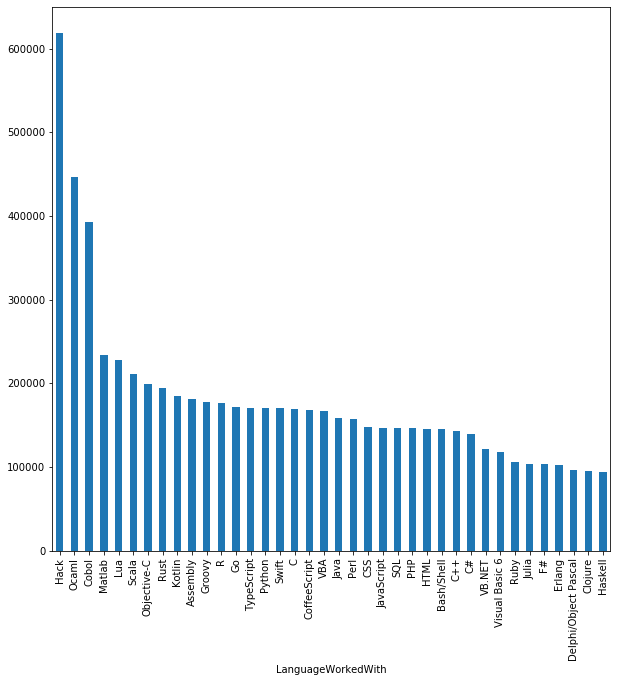

In [18]:
 #plotting the sorted table in descending order
plot_table = sal_table.groupby(['LanguageWorkedWith']).mean()['ConvertedSalary'].sort_values( ascending=False)  
plt.figure(figsize=(10,10))
plot_table.plot(kind = 'bar')


In [22]:
#To select the column wherein we have to find the female/male ratio
female_ratio = US_2018.pivot_table(index='Employment', columns='Gender', aggfunc='size', fill_value=0) 
sums = female_ratio[['Female', 'Male']].sum(axis=1)                                #the total proportion of male and female
female_ratio['FemaleRatio'] =  round(100 * female_ratio['Female'] / sums , 1)      # the female_rati
female_ratio['FemaleRatio']

Employment
Employed full-time                                       8.4
Employed part-time                                      10.9
Independent contractor, freelancer, or self-employed     8.1
Not employed, and not looking for work                   5.9
Not employed, but looking for work                      10.3
Retired                                                 11.1
Name: FemaleRatio, dtype: float64

In [23]:
"""Create a new dataframe with Employment and FemaleRatio as columns 
from the data recieved in female_ratio."""

data={'Employment':['Employed full-time','Employed part-time ','Independent contractor, freelancer, or self-employed ','Not employed, and not looking for work ','Not employed, but looking for work ','Retired '],'FemaleRatio':['8.4','10.9','8.1','5.9','10.3','11.1']}
US_Genratio= pd.DataFrame(data)
US_Genratio

,Employment,FemaleRatio
0,Employed full-time,8.4
1,Employed part-time,10.9
2,"Independent contractor, freelancer, or self-em...",8.1
3,"Not employed, and not looking for work",5.9
4,"Not employed, but looking for work",10.3
5,Retired,11.1


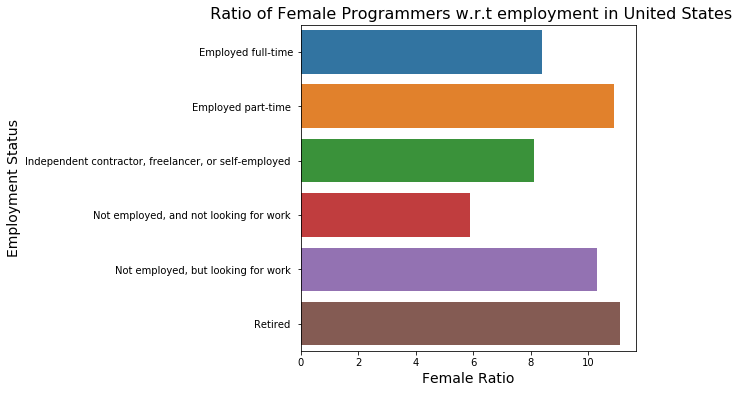

In [21]:
 #plot employment v/s female ratio graph using sns plot
plt.figure(figsize=(6,6))
sns.barplot(x = 'FemaleRatio', y = 'Employment',data = US_Genratio)
plt.title(' Ratio of Female Programmers w.r.t employment in United States', size = 16)
plt.xlabel("Female Ratio", fontsize = 14)
plt.ylabel("Employment Status", fontsize = 14)

plt.show()